# Определение успешности игры. Планирование рекламных кампаний

## Описание проекта

В проекте нужно выявить критерии успешности платформы, чтобы делать ставку на игры от успешных платформ в рекламных кампаниях на следующий год.

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План действий
1. Посмотреть что имеется в таблице и определить пропуски и типы данных
2. Решить проблемы с пропусками и типами данных. Привести таблицу с рабочему варианту
3. Провести исследовательский анализ
    - проанализировать игры по годам
    - проанализировать платформы по прибыли
    - проанализировать жанры
4. Составить портреты пользователей из разных регионов
    - популярные платформы
    - популярные данры
    - влияние рейтинг ESRB на продажи
5. Проверить гипотезы
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - редние пользовательские рейтинги жанров Action и Sports разные
6. Общий вывод по проекту

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
m = Mystem()
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv')
#df = pd.read_csv('C://Users/pm/Desktop/Практикум/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [4]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Вывод

- Нужно приводить названия колонок в нижнему регистру
- Есть пропуски. Надо посмотреть на их количество к общему значению и решить как заполнить
- Привести как минимум год и рейтинг к целочисленному типу данных

## Шаг 2. Предобработка данных

Приведу названия колонок к нижнему регистру. Также хочу заменить название 'year_of_release', на 'year' для своего удобства и тоже замену сделаю с 'name' на 'game'

In [5]:
df.columns = df.columns.str.lower()
df.columns = ['game', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.head()

,game,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Хочу понять где есть пропуски и в каком количестве относительно всего датасета

In [6]:
df_null = pd.DataFrame(data=df.columns, columns=['column'])
df_null['count_na'] = df.isna().sum().values
df_null['percent_na'] = np.round(df.isna().sum().values / len(df) * 100, 2)
df_null

,column,count_na,percent_na
0,game,2,0.01
1,platform,0,0.00
2,year,269,1.61
3,genre,2,0.01
4,na_sales,0,0.00
5,eu_sales,0,0.00
6,jp_sales,0,0.00
7,other_sales,0,0.00
8,critic_score,8578,51.32
9,user_score,6701,40.09


In [7]:
df[df['game'].isna() == True]

,game,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
null_year = df[df['year'].isna() == True].pivot_table(index='platform', values='game', aggfunc=['count']).reset_index()
null_year.columns = ('platform', 'count')
null_year = null_year.sort_values(by='count')
null_year

,platform,count
3,GB,1
12,PSV,1
6,N64,3
8,PS,7
1,3DS,8
4,GBA,11
5,GC,14
11,PSP,16
0,2600,17
7,PC,17


От пропусков в колонках по названию игры и в колонке по жанру можно убрать из выборки, потому что относительно всей выборки это очень маленькое количество и эти пропуски у нас находятся на одних и тех же позициях, судя по куску таблицы выше. Также я хочу убрать из выборки те игры, в графе год выпуска которых пустые значения. Можно было бы вручную искать эти игры и вписать год выпуска, но это займет время, а профита мало, т.к. доля пропущенных значений по году меньше 2%, что тоже немного.  

Причины пропусков вижу в том, что была потеряна информация либо она была противоречивой в источнике об игре и поэтому в колонке с названием и жанром мы получаем пропуск. Но сама продажа была, поэтому ее выгрузили из источника.
Пропуски в годе по большей части у платформ Wii, PS2, X360, DS, что странно, потому что это современные платформы и даты релиза у них должны быть в сети. Возможно, что пропуски это следствие эспорта.

In [9]:
df = df.dropna(subset=['game', 'year']).reset_index()

Колонку с годами привожу к целочисленному типу, потому что в жизни мы не используем доли в годах

In [10]:
df['year'] = df['year'].astype('int64')

Я не вижу смысла в заполнении оценок от критиков и пользователей, т.к. это субъективные оценки и если заполнять по жанрам и платформам средним значением или медианой, то это может повлиять на дальнейшее исследование в вопросах про оценке. К тому же цель исследования состоит в том, чтобы понять критерии успеха-неуспеха и если сделать замену на среднюю, медиану или еще какую величину, а не на реальные данные, то можно исказить результаты исследования. Поэтому я решила заполнить пропущенные значения в этих колонках значением 0, чтобы в случае необходимости убрать из выборки. Так как этого значения нет в выборках, то путаницы не должно возникнуть. Таким образом у меня сразу будет нужный мне тип данных. В оценке критиков это int64, а в оценке пользователей это float64. 

Причины пропусков в человеческом факторе может быть, т.е. человек(критик или пользователь) мог играть, но решил не оставлять своего мнения по игре в виде оценки. Либо же сама платформа не предоставила возможности, чтобы это сделать.

В колонке с оценкой пользователей есть значение 'tbd' от англ. *'To Be Determined'*, это обозначение нужно для событий, даты публикации которых, неопределены. Как я понимаю применительно в колонке с оценкой пользователей это обозначает, что игре пользователи не поставили оценку, т.е. можно это присудить к пропускам и сделать замену на значений 'no_info'

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [13]:
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)

In [14]:
df['critic_score'] = df['critic_score'].astype('int64')
df['user_score'] = df['user_score'].astype('float64')

Пропусков в колонке с рейтингом довольно много 40,48%, больше чем в остальных.

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
df[df['rating'].isna() == True].head()

,index,game,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN
10,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,NaN


Из выгрузки с пропущенным рейтингом от ESRB я взала пару игр и на оф.сайте организации нашла их. Получается, что пропуски появились не от того, что эти игры не получили рейтинг от ESRB, а в том, откуда выгружался датасет. Можно было бы проставить рейтинг 6766 играм, но я, к сожалению, не знаю как это сделать быстро с помощью программирования(пока), но заполнять руками будет очень долго. Трата времени не целесообразна, лучше построить предположения по меньшей выборке, чем нам дана была изначально. Поэтому заполню пропуски значением 'no_info', потому что по жанру и году выпуска заполнять рейтинг неправильно. Он зависит от сюжета игры, графики и самых резких сцен, которые оценивают многие люди разных возрастов и слоёв общества, не связанные с игровой индустрией. Это субъективная оценка опять же и оснований(метрик) для ее проставления у меня нет.

In [17]:
df['rating'] = df['rating'].fillna('no_info')

Сделаем колонку с суммарными продажами по играм

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

В итоге получается такой датасет. Пропуски заполнены и убраны из выборки.

In [19]:
df.head()

,index,game,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,no_info,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,no_info,31.38


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
index           16444 non-null int64
game            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    16444 non-null int64
user_score      16444 non-null float64
rating          16444 non-null object
total_sales     16444 non-null float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.6+ MB


## Шаг 3. Исследовательский анализ данных

### Определение актуального периода для исследования

Посмотрим какое количество игр выпускалось в разные годы. Наверняка, раньше их выпускалось меньше, потому что технологии были не так развиты как сегодня и были доступны не каждому.

In [21]:
df.pivot_table(index='year', values='game', aggfunc=['count'])

,count
,game
year,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


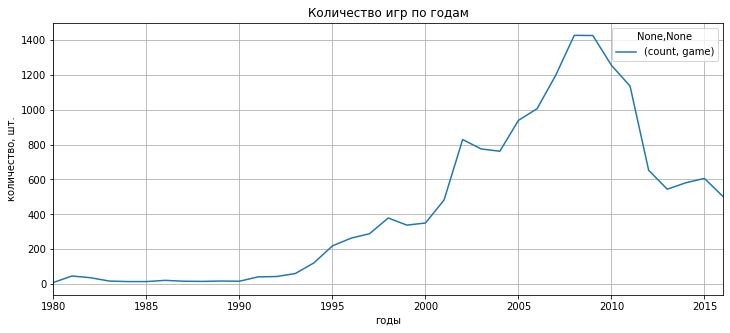

In [22]:
ax = df.pivot_table(index='year', values='game', aggfunc=['count']).plot(grid=True, figsize=(12, 5), title='Количество игр по годам')
plt.ylabel("количество, шт.")
plt.xlabel("годы")
plt.show()

Как и думала, в 80-е и 90-е годы игр было на порядок меньше, чем в 00-е. Начиная с 94 года количество увеличилось в двое (121 шт.) и дальше росло. Пик пришелся на 2008 и 2009 годы (1427 и 1426 шт. соответственно), дальше количество игр постепенно уменьшалось и сейчас держиться на уровне 500-600 шт. в год.

Уберем более ранние сроки, когда игр выпускалось мало. Информации они для нас не несут.

In [23]:
df = df[df['year'] >= 1994]

Думаю, что для дальнейшего анализа и выявления критериев хорошей игры и платформы я буду использовать игры с 2005 года выпуска, потому что их на порядок больше, чем до этого периода и выборка будет более разнообразной. К тому же раньше время не стоит на месте и критерии успеха раньше и сейчас могут различаться.

Посмотрим какие продажи были на разных платформах. Выберем ТОП платформ с наибольшими суммарными продажами и построим распределение по годам.

In [24]:
df.head()

,index,game,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,no_info,31.38
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80


In [25]:
platf = df.pivot_table(index='platform', values='total_sales', aggfunc=['sum']).reset_index()
platf.columns = ['platform', 'total_sales']
platf = platf.sort_values('total_sales')
platf

,platform,total_sales
12,PCFX,0.03
0,3DO,0.10
9,NES,0.11
22,TG16,0.16
20,SCD,0.36
10,NG,1.23
23,WS,1.42
7,GEN,8.13
2,DC,15.95
19,SAT,33.59


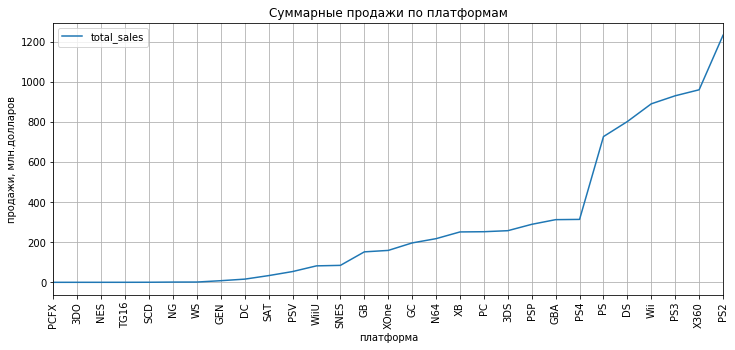

In [26]:
ax = platf.plot(x='platform', y='total_sales', grid=True, figsize=(12, 5), title='Суммарные продажи по платформам')
plt.xticks(np.arange(len(platf)), platf['platform'], rotation=90)
plt.ylabel("продажи, млн.долларов")
plt.xlabel("платформа")
plt.show()

Исходя из графика я решила взять платформы для распределения по годам начиная с платформы PS4, т.к. начиная с нее идут платформы с самыми большими суммарными продажами. Получилось ТОП-6 платформ.

In [27]:
platf_top = platf.tail(6)['platform']
platf_top

13      PS
3       DS
24     Wii
15     PS3
26    X360
14     PS2
Name: platform, dtype: object

Text(0.5, 0, 'год')

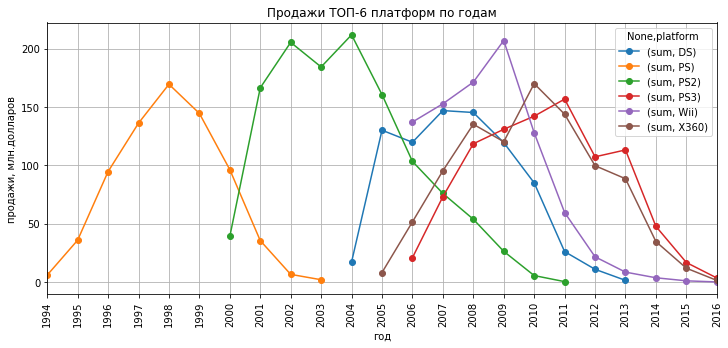

In [28]:
df.query('platform in @platf_top').pivot_table(index='year', columns='platform', values='total_sales', aggfunc=['sum']).plot(title='Продажи ТОП-6 платформ по годам', grid=True, figsize=(12,5), style='o-')
plt.xticks(np.arange(1994, 2017, step=1), rotation=90)
plt.ylabel("продажи, млн.долларов")
plt.xlabel("год")    

Если мы уберем DS, которая "жила" дольше всех платформ с 1985 по 2013 гг, то получается что новые платформы появляются с периодичностью 5-6 лет, а изчезают за 10 лет.

Апдейт: Возьму актуальный период в половину жизненного цикла платформы, т.е. 5 лет. Актуальный период получается с 2011 по 2016 гг.

Теперь возьму актуальный период, как выше писала я хотела взять период с 2011 по 2016 гг, поэтому создам отдельную переменную с этим периодом.

In [29]:
df_act = df.query('year >= 2011')
df_act.head()

,index,game,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,no_info,14.63
33,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,no_info,14.60


### Изучение платформ

Платформ очень много получилось и на общем графике непонятно было где какая платформа. Поэтому хочу сделать 3 графика по разным производителям.

In [30]:
print('Количество платформ в актуальном периоде:', len(df_act['platform'].unique()), 'шт.')
df_act['platform'].unique()

Количество платформ в актуальном периоде: 12 шт.


array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [31]:
nintendo = ['3DS', 'DS', 'Wii', 'WiiU']
microsoft = ['X360', 'XOne', 'PC']
sony = ['PS2', 'PS3', 'PS4', 'PSP', 'PSV']

Text(0.5, 0, 'год')

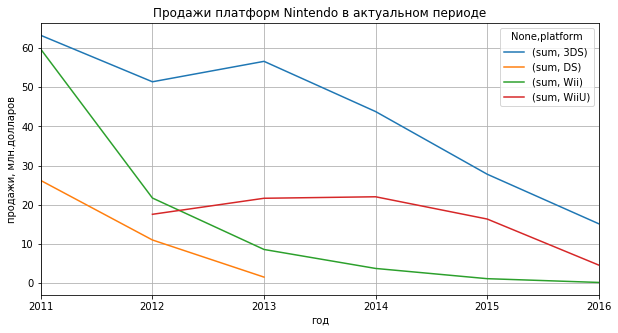

In [32]:
df_act.query('platform in @nintendo').pivot_table(index='year', columns='platform', values='total_sales', aggfunc=['sum']).plot(title='Продажи платформ Nintendo в актуальном периоде', grid=True, figsize=(10,5))
plt.ylabel("продажи, млн.долларов")
plt.xlabel("год") 

Text(0.5, 0, 'год')

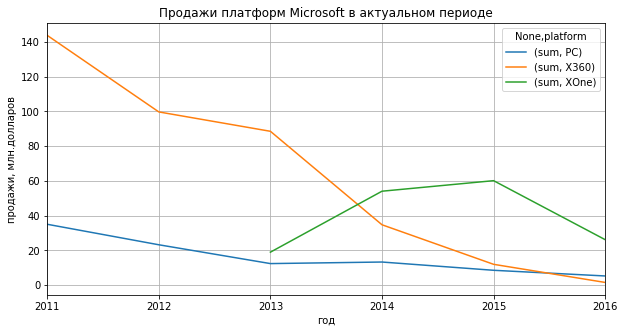

In [33]:
df_act.query('platform in @microsoft').pivot_table(index='year', columns='platform', values='total_sales', aggfunc=['sum']).plot(title='Продажи платформ Microsoft в актуальном периоде', grid=True, figsize=(10,5))
plt.ylabel("продажи, млн.долларов")
plt.xlabel("год")    

Text(0.5, 0, 'год')

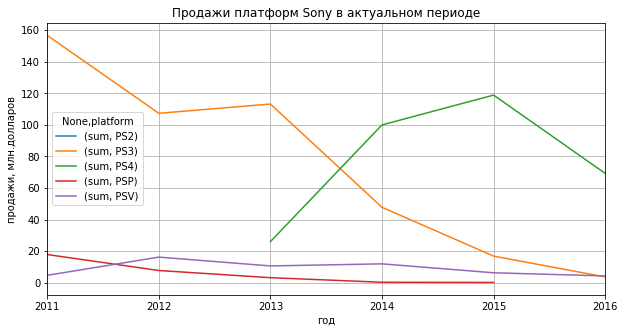

In [34]:
df_act.query('platform in @sony').pivot_table(index='year', columns='platform', values='total_sales', aggfunc=['sum']).plot(title='Продажи платформ Sony в актуальном периоде', grid=True, figsize=(10,5))
plt.ylabel("продажи, млн.долларов")
plt.xlabel("год") 

Получается такая картина: 
1. Платформы, продажи которых упали: 
    - Все платформы от Nintendo либо упали(GBA, GC, DC) в продажах либо падают(Wii, WiiU, 3DS). Хотя платформа Wii имела успех в продажах по сравнению со своими товарками, но в 2016 году продажи на нуле.
    - У производителя Microsoft продажи просели на платформах XB и X360.
    - У производителя Sony PS2, PSP, PS3 упали в продажах
    - У SEGA продажи на платформе DS упали в 2013 году и PC упал по сравнению с подъемом 2011 года
2. Не увидела на графиках платформы, продажи которых растут. По сравнению с предыдущими годами продажи просели у всех.
3. Но можно выделить перспективные платформы, продажи которых упали несильно и они вполне могут набрать обороты, т.к. платформа свежая. Это **PS4** от Sony, **XOne** от Microsoft. Я делаю ставку именно на более новые платформы, т.к. даже самые доходные платформы рано или поздно станут неинтересны (PS2 1233,56 млн.долларов итоговых продаж дальше 2011 года не получила дохода от продажи игр). Игры сейчас все таки развиваются, графика становится все лучше, нужны более мощные "движки", чтобы поддерживать на уровне играбельности рендер локаций и персонажей.

Построим ящик с усами, чтобы понять как отличаются продажи двух перспективных платформ и их среднием.

In [35]:
platform_act = ['PS4', 'XOne']

Text(0, 0.5, 'продажи, млн.долларов')

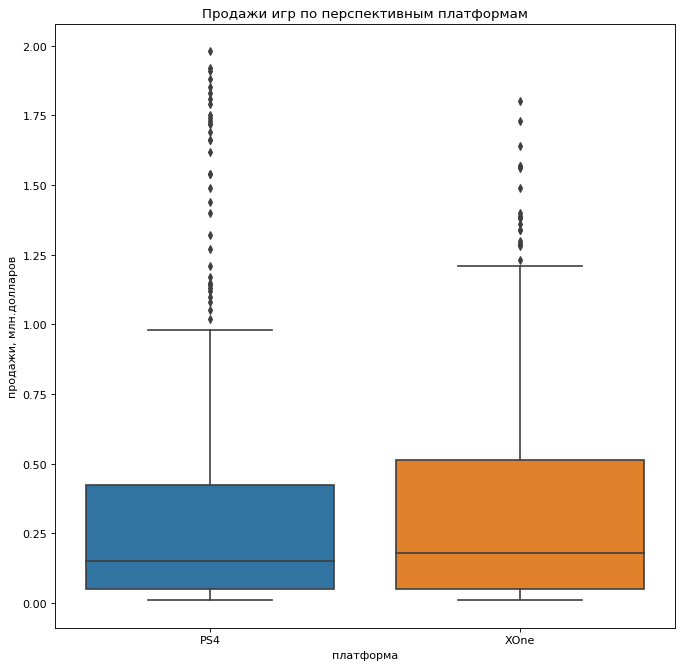

In [36]:
plt.figure(figsize=(10, 10), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=df_act.query('platform in @platform_act & total_sales <= 2'))
plt.title('Продажи игр по перспективным платформам')
plt.xlabel('платформа')
plt.ylabel('продажи, млн.долларов')

Продажи отличаются на платформах: у PS4 есть выбросы, которые почти в 2 раза дороже(>14 млн.долларов), чем XOne(>7 млн.долларов4). Я сделала ограничение в 2 млн.долларов, чтобы "ящик" был нагляднее. Средние значения продаж у них почти не отличаются друг от друга на уровне 130 тыс.долларов за игру. Не смотря на то, что у платформы PS4 выборосы значительнее, но у XOne размах усов больше, а значит что нормальные значения лежат в большем диапазоне, т.е. игры дороже.

### Корреляция в отзывах

Для исследования влияния отзывов на продажи возьму платформу PS4 и уберу из отзывов значение 0, чтобы оно не помешало построению графиков и рассчету корреляции, т.к. это была наша замена пропущенным значениям.

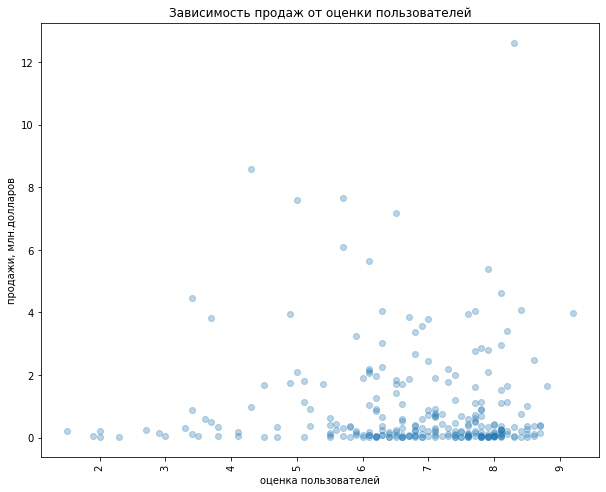

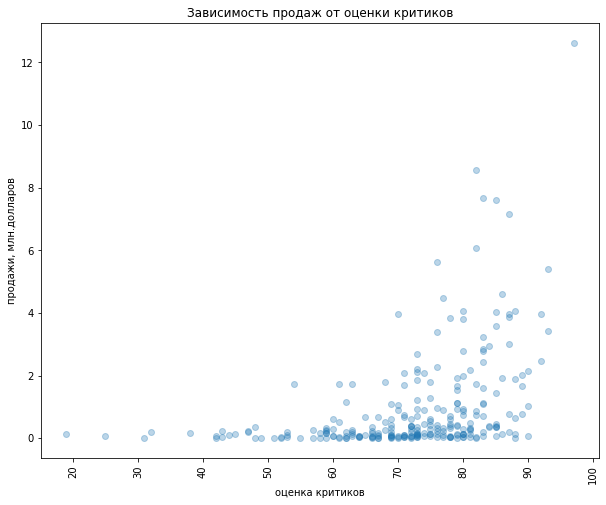

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(df_act.query('platform == "PS4" & user_score != 0').sort_values('user_score')['user_score'], df_act.query('platform == "PS4" & user_score != 0').sort_values('user_score')['total_sales'], alpha=0.3)
plt.xticks(rotation=90)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн.долларов')
plt.figure(figsize=(10, 8))
plt.scatter(df_act.query('platform == "PS4" & critic_score != 0').sort_values('critic_score')['critic_score'], df_act.query('platform == "PS4" & critic_score != 0').sort_values('critic_score')['total_sales'], alpha=0.3)
plt.xticks(rotation=90)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн.долларов')
plt.show()

In [38]:
print('Корреляция между оценками пользотелей и продажами на платформе PS4:', round(df_act.query('platform == "PS4" & user_score != 0')['user_score'].corr(df_act.query('platform == "PS4" & user_score != 0')['total_sales'], method='pearson'), 2))
print('Корреляция между оценками критиков и продажами на платформе PS4:', round(df_act.query('platform == "PS4" & critic_score != 0')['critic_score'].corr(df_act.query('platform == "PS4" & critic_score != 0')['total_sales'], method='pearson'), 2))

Корреляция между оценками пользотелей и продажами на платформе PS4: -0.03
Корреляция между оценками критиков и продажами на платформе PS4: 0.41


По графику и по коэффициенту Пирсона видно, что зависимость продаж от оценки критиков есть и она прямая, но слабая. А оценка пользователей на продажи можно сказать, что не влияет. Но эти показатели на основе продаж только одной платформы PS4, поэтому нужно посмотреть похожа ли ситуация с зависимостью на других платформах, чтобы сделать однозначные выводы по этому вопросу.
Можно предположить, что какая-то зависимость есть, но она не линейного характера. К примеру, на графиках видно, что игры с низкими оценками критиков и пользователей продавались плохо.

In [39]:
list_platform = df_act['platform'].unique()
list_platform

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [40]:
corr_user = []
corr_critic = []
for i in list_platform:
    u = 0
    c = 0
    u = round(df_act.query('platform == @i & user_score != 0')['user_score'].corr(df_act.query('platform == @i & user_score != 0')['total_sales'], method='pearson'), 2)
    c = round(df_act.query('platform == @i & critic_score != 0')['critic_score'].corr(df_act.query('platform == @i & critic_score != 0')['total_sales'], method='pearson'), 2)
    corr_user.append(u)
    corr_critic.append(c)

In [41]:
df_corr = pd.DataFrame(columns=['Корреляция с оценками пользователей'], data=corr_user)
df_corr['Корреляция с оценками критиков'] = corr_critic
df_corr = df_corr.T
df_corr.columns = list_platform
df_corr

,PS3,X360,PS4,3DS,Wii,DS,XOne,WiiU,PC,PSV,PSP,PS2
Корреляция с оценками пользователей,0.01,0.04,-0.03,0.22,0.15,0.28,-0.07,0.40,-0.05,0.01,0.01,-0.49
Корреляция с оценками критиков,0.38,0.39,0.41,0.35,0.29,0.26,0.42,0.35,0.31,0.13,0.36,NaN


Судя по таблице с коэффицентами Пирсона по оценкам пользователей и критиков по разным платформам нельзя сказать, что есть связь с продажами. Максимальная связь это 0,42 коэфф.Пирсона только у платформы XB по отношению к оценкам критиков. Но этого недостаточно, чтобы утверждать, что оценка критиков влияет на успешность платформы, поэтому не будем учитывать этот критерий в окончательных выводах.

### Влияние жанра на продажи

Теперь посмотрим как влияет жанр игры на продажи. Может есть какой-то хорошо продаваемый жанр?

In [42]:
genre = df_act['genre'].unique()
genre

array(['Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

Text(0, 0.5, 'продажи, млн.долларов')

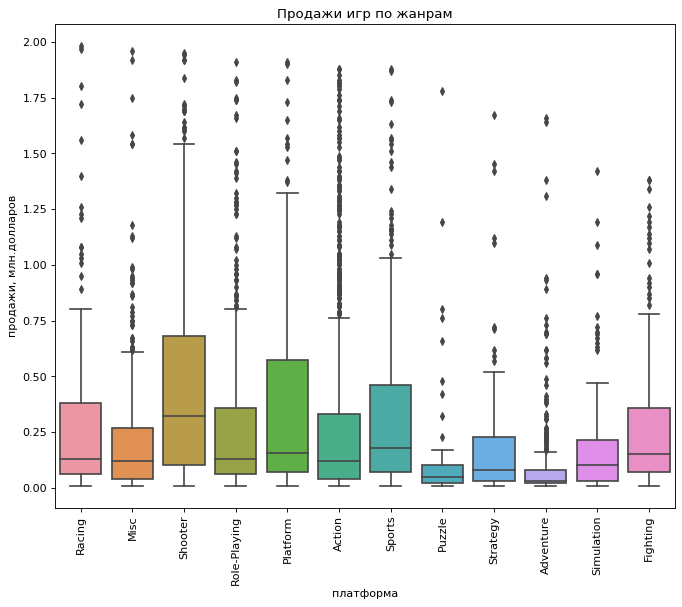

In [43]:
plt.figure(figsize=(10, 8), dpi= 80)
sns.boxplot(x='genre', y='total_sales', data=df_act.query('total_sales <= 2'))
plt.xticks(rotation=90)
plt.title('Продажи игр по жанрам')
plt.xlabel('платформа')
plt.ylabel('продажи, млн.долларов')

Я ограничила суммарные продажи до 2 млн.долларов, т.к. хотелось рассмотреть более наглядно с размахами и средним значениями цифры. 

Получаем такую картинку, что жанры Adventure, Puzzle не самые дорогие и продаваемые. С продажами лучше остальных выделились жанры Shooter, Sports, Platform, Fighting. Остальные жанры на примерно одинаковом уровне по средним значениям.

### Вывод

Если собрать все что получилось, то мы получаем следующее:
- Продаваемые жанры Shooter, Sports, Platform и Fighting.
- Перспективные платформы PS4 и XOne. Вообще линейка платформ от производителя Sony выделилась тем, что суммарную прибыль они приносили больше всех. Они все находятся в ТОП-7 самых прибыльных платформ за весь рассматриваемый период. 
- Продажи не зависят от оценок пользователей и критиков.

## Шаг 4. Портреты пользователей из каждого региона

Составим сводную таблицу по продажам в разных регионах по платформам.

In [44]:
region_platform = df_act.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum'])
region_platform.columns = ['eu', 'jp', 'na', 'other']
region_platform

,eu,jp,na,other
platform,,,,
3DS,61.27,100.62,82.65,13.27
DS,9.24,8.04,18.86,2.59
PC,56.70,0.00,29.88,11.10
PS2,0.13,0.09,0.13,0.10
PS3,163.10,49.39,168.26,64.82
PS4,141.09,15.96,108.74,48.35
PSP,1.77,24.04,2.19,1.01
PSV,13.07,21.84,12.47,6.43
Wii,29.60,8.97,48.56,7.89


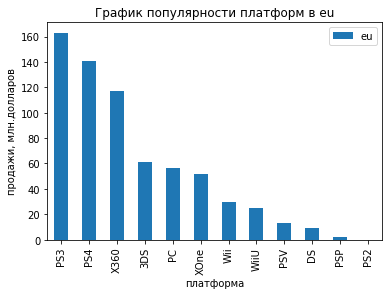

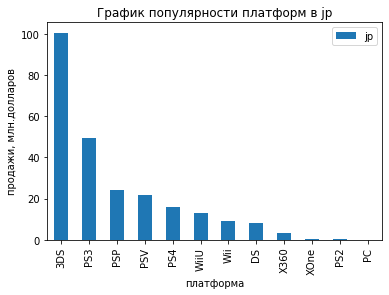

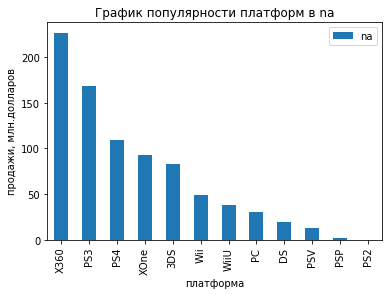

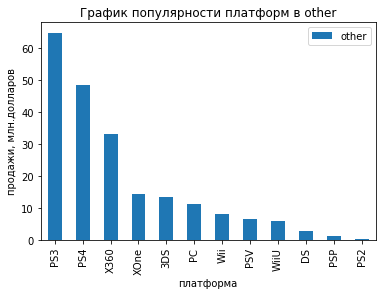

In [45]:
for i in region_platform.columns:
    region_platform.sort_values(i, ascending=False).plot(kind='bar', y=i, subplots=True)
    plt.title("График популярности платформ в " + i)
    plt.xlabel("платформа")
    plt.ylabel("продажи, млн.долларов")
    plt.show()

В Европе PS3 на первом месте 160 млн.долларов. X360 и PS4 разделяют 2 и 3 место около 140 и 120 млн.долларов соответственно.

Самая популярная платформа в Японии это платформа 3DS от Nintendo(около 100 млн.долларов), потом идет PS3 (50 млн.долларов).

В Северной Америке дела обстоят иначе. Игры на платформе X360 продали больше 200 млн.долларов. На втором месте в регионе стоит PS3 - больше 150 млн.долларов.

Тоже самое сделаем по жанрам

In [46]:
region_genre = df_act.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum'])
region_genre.columns = ['eu', 'jp', 'na', 'other']
region_genre

,eu,jp,na,other
genre,,,,
Action,199.12,63.62,230.92,64.14
Adventure,13.96,12.07,14.76,4.25
Fighting,16.24,12.38,31.63,6.65
Misc,39.72,17.60,69.69,12.41
Platform,30.07,12.13,38.28,8.20
Puzzle,3.56,2.91,2.74,0.64
Racing,40.58,5.64,31.98,10.11
Role-Playing,62.30,79.87,83.78,19.68
Shooter,148.02,11.92,194.43,48.54


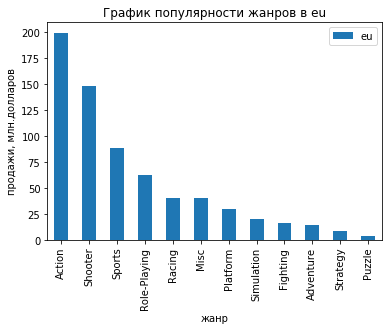

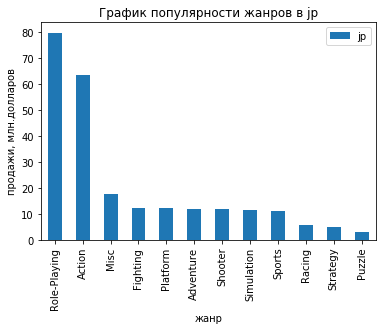

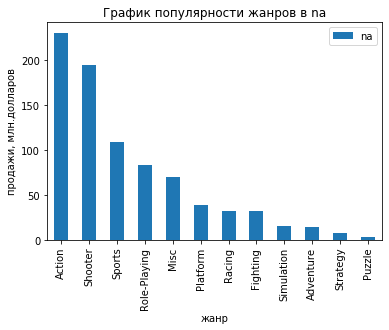

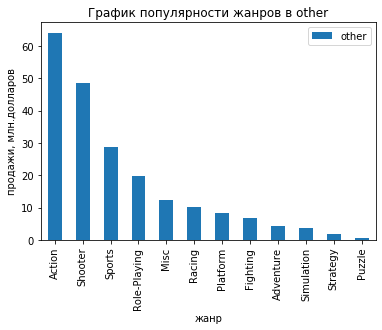

In [47]:
for i in region_genre.columns:
    region_genre.sort_values(i, ascending=False).plot(kind='bar', y=i, subplots=True)
    plt.title("График популярности жанров в " + i)
    plt.xlabel("жанр")
    plt.ylabel("продажи, млн.долларов")
    plt.show()

В Европе и Северной Америке наблюдается единодушие по любви к жанрам. Самый популярный жанр игр в этих регионах это Action, потом идет Sports, затем Shooter и на четвертом месте Role-Playing. В Японии Action жанр на втором месте и уступает жанру Role-Playing.

И повторим на рейтинге. Я убрала из рейтинга значение 'no_info', чтобы оно не мешало.

In [48]:
region_rating = df_act[df_act['rating'] != 'no_info'].pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum'])
region_rating.columns = ['eu', 'jp', 'na', 'other']
region_rating

,eu,jp,na,other
rating,,,,
E,141.73,36.68,170.17,40.86
E10+,78.00,11.23,117.72,23.91
EC,0.00,0.00,0.42,0.03
M,250.26,26.14,308.45,81.96
RP,0.03,0.00,0.00,0.01
T,83.16,33.39,109.31,28.17


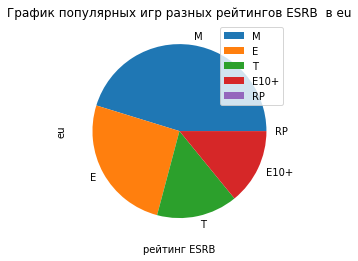

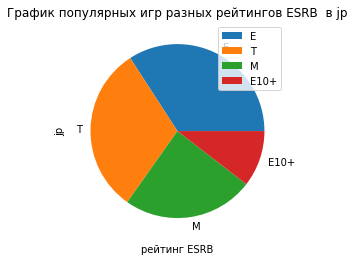

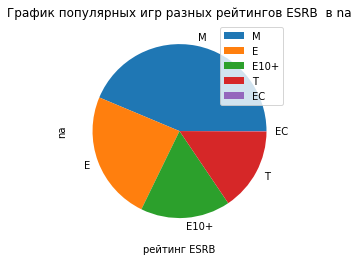

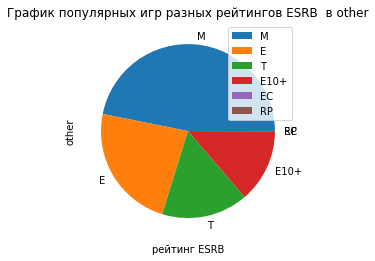

In [49]:
for i in region_rating.columns:
    region_rating.sort_values(i, ascending=False).plot(kind='pie', y=i, subplots=True)
    plt.title("График популярных игр разных рейтингов ESRB  в " + i)
    plt.xlabel("рейтинг ESRB")
    plt.show()

Очевидно, что рейтинг вносит ограничение в продажу для более широкой аудитории. Европа и Северная Америка похожи в свом распределении продаж игр по рейтингам. У них превалирует рейтинг М "Для взросых", а потом E "Для всех"

А Япония выделилась тем, что игры для подростков и для всех почти поровну.

### Вывод

Выделим типичного пользователя в каждом регионе:
- Северная Америка. Любимая платформа X360 и PS3, играет жанр Action, Sports и Shooter, игры на для всех и для взрослых в основном. 
- Европа. Любимая платформа PS3 и X360, играет жанр Action, Sports и Shooter, игры на для всех и для взрослых в основном. 
- Япония. Любимая платформа 3DS и PS3, играет жанр Role-Playing и Action, игры на для всех и для подростков в основном. 

Я специально поставила рядом с нужными регионами продажи из других стран в целом, чтобы понять на что похож "остальной мир" по поведению. Это все условно, но, исходя из графиков, можно предположить, что "остальной мир" по предпочтениям похож на Северную Америку и Европу. По платформам только вышел из общей картины, в предпочтениях PS3 и PS2.

## Шаг 5. Проверка гипотез

Гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: средняя оценка пользователей платформы Xbox One равна средней оценке пользователей платформы PC

H1:средняя оценка пользователей платформы Xbox One НЕ равна средней оценке пользователей платформы PC

In [50]:
alpha = .05

results_platform = st.ttest_ind(
    df.query('platform == "XB" & user_score != 0')['user_score'],
    df.query('platform == "PC" & user_score != 0')['user_score'], equal_var=False)
print('p-значение по платформам:', results_platform.pvalue)

if (results_platform.pvalue < alpha):
    print("Отвергаем нулевую гипотезу по платформам")
else:
    print("Не получилось отвергнуть нулевую гипотезу по платформам")

p-значение по платформам: 5.4825758651208154e-08
Отвергаем нулевую гипотезу по платформам


Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports разные.

Н0: средняя оценка пользователей жанра Action равна средней оценке пользователей жанра Sports

Н1: средняя оценка пользователей жанра Action НЕ равна средней оценке пользователей жанра Sports

In [51]:
results_genre = st.ttest_ind(
    df.query('genre == "Action" & user_score != 0')['user_score'], 
    df.query('genre == "Sports" & user_score != 0')['user_score'], equal_var=False)
print('p-значение по жанрам:', results_genre.pvalue)

if (results_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу по жанру")
else:
    print("Не получилось отвергнуть нулевую гипотезу по жанру")

p-значение по жанрам: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу по жанру


### Вывод

Получается, что у нас гипотеза №1 о равенстве средней пользовательской оценке между платформами мы отвергаем, XB не равны PC в средних оценках пользователей. Платформы разные, игры на них выходят тоже разные. Поэтому рассматривать их лучше отдельно и проводить кампании тоже отдельно. Тоже самое можно сказать и про жанры. Гипотеза №2 о равенстве между жанрами не подтверждается, у нас средние оценки пользователей по жанрам Action и Sports равны. Видимо, эти жанры для сходных аудиторий.

Я выбрала для проверки гипотез проверку через st.ttest_ind, т.к. у нас сравниваются 2 средних значения друг с другом. Зависимости между ними нет.

## Шаг 6. Общий вывод

Наша цель в этом исследовании понять закономерности успешной игры, чтобы спланировать рекламные кампании на следующий 2017 год.  Анализ проводился с 2011 по 2016 год. За это время было выпущено достаточно большое количество игр, чтобы делать выводы.

Мы поняли, что платформы приходят и уходят, поэтому ставку в следующем году лучше сделать на игры, выходящих на более современных платформах, таких как XOne и PS4. Учитывая, что жизненный цикл платформы около 10 лет, то эти платформы еще ждет свой максимум в продажах. Средства в случае с платформами нужно разделить поровну, т.к. средние значения у этих платформ похожи. Если рассматривать географию направления, то часть бюджета от PS4 нужно потратить на кампании для Японии, а другую часть от XOne потратить на сегмент Европы и Северной Америки.

По жанрам тоже нужно распределить бюджет. Большую часть поделить между популярными жанрами:  Sports и Shooter. Часть на продвижение Role-Playing нужно распределить больше на японскую аудиторию, т.к. там жанр более востребован. А Action, Shooter  больше на Европу и Северную Америку.

Нужно распределеить средства так, чтобы часть была направлена на рейтинг "E" по всему миру, часть в Европе и Северной Америке в рейтинг "M", а часть в Японии рейтинг "T".

Зависимость продаж от оценок критиков есть небольшая. Можно было бы выделить небольшую часть бюджета на игры с высокими оценками, но больше в целях экспреримента.

На будущее нужно точно будет проследить за появлением новых платформ и развитием жанров.

Как пример можно было бы разделить бюджет на 3 части(45,45,10):
1. Европа и Северная Америка. Платформа - XOne, жанр -  Action, Sports и Shooter, рейтинг - E + M
2. Япония. Платформа - PS4, жанр - Role-Playing, рейтинг - E + T
3. Остальной мир. Платформа - PS3(как более новая), жанр -  Action, Sports и Shooter, рейтинг - E + M